In [1]:
# import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler, robust_scale
plt.rcParams.update({'font.size': 22})
import tool

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 以月分做分群

In [2]:
# import the dataset
dataset = tool.read_ele_csv(r'D:\JunShen\dataset\彰化_雲林用電量(非專用電表_day_raw.csv')

讀取用電資料: D:\JunShen\dataset\彰化_雲林用電量(非專用電表_day_raw.csv
讀取 500 筆資料之花費時間: 0.12 分鐘
讀取 1000 筆資料之花費時間: 0.25 分鐘
讀取 1500 筆資料之花費時間: 0.39 分鐘
讀取 2000 筆資料之花費時間: 0.52 分鐘
讀取 2500 筆資料之花費時間: 0.65 分鐘
讀取 3000 筆資料之花費時間: 0.78 分鐘
讀取 3500 筆資料之花費時間: 0.9 分鐘
讀取 4000 筆資料之花費時間: 1.03 分鐘
讀取 4500 筆資料之花費時間: 1.09 分鐘
Stop iteration!
串接資料花費時間: 1.09 分鐘
用電資料讀取完成!!


In [3]:
dataset.head()

,date,98666106.0,98666005.0,98662541.0,98662535.0,98662527.0,98662400.0,98662012.0,98662008.0,98661810.0,...,98646352.0,98652412.0,63439500.0,98664911.0,63440513.0,43119810.0,98155469.0,53547020.0,44318829.0,53559819.0
0,2007-01-01,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
1,2007-01-02,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
2,2007-01-03,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
3,2007-01-04,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
4,2007-01-05,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323


In [4]:
dataset.describe()

,98666106.0,98666005.0,98662541.0,98662535.0,98662527.0,98662400.0,98662012.0,98662008.0,98661810.0,98657100.0,...,98646352.0,98652412.0,63439500.0,98664911.0,63440513.0,43119810.0,98155469.0,53547020.0,44318829.0,53559819.0
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,...,4199.000000,4199.000000,4169.000000,4199.000000,4169.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,11.232674,8.073351,6.560610,16.359371,0.979281,5.834484,18.702548,2.319124,2.881162,6.923077,...,0.322577,0.834961,2.656512,7.428912,2.487347,0.901048,20.765063,0.606097,37.929031,1.110026
std,3.257253,2.158233,4.121189,3.320411,0.396694,1.812683,12.042409,1.256472,2.129362,1.156085,...,0.207116,0.277575,1.497751,3.766262,1.833872,1.746943,17.143601,0.284939,32.922596,0.935963
min,6.241935,4.887097,3.016129,8.096774,0.209677,0.967742,0.000000,0.080645,1.096774,4.435484,...,0.000000,0.185484,0.532258,2.290323,0.000000,0.000000,0.466667,0.040323,5.225806,0.000000
25%,8.950000,6.290323,4.403226,14.096774,0.666667,4.983333,12.306452,1.583333,1.793103,6.161290,...,0.177419,0.645161,1.524194,5.500000,1.224138,0.072581,7.714286,0.391667,15.928571,0.375000
50%,10.683333,7.354839,4.967742,16.833333,0.919355,6.196429,14.482759,2.016129,2.266667,6.935484,...,0.290323,0.846774,2.339286,6.379032,2.298387,0.193548,15.866667,0.596774,25.000000,0.766129
75%,12.709677,10.000000,7.419355,18.774194,1.200000,6.790323,29.209677,2.951613,3.064516,7.806452,...,0.475806,1.008929,3.275000,8.072581,3.298387,0.321429,29.200000,0.758065,48.000000,1.566667
max,21.700000,12.839286,24.435484,25.066667,2.232143,9.283333,48.410714,6.370968,16.083333,9.112903,...,0.875000,1.583333,7.758333,26.000000,12.291667,8.525000,80.066667,1.441667,244.416667,3.400000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Columns: 53464 entries, date to 53559819.0
dtypes: float64(53463), object(1)
memory usage: 1.7+ GB


In [3]:
dataset.date = dataset.date.astype(np.datetime64)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Columns: 53464 entries, date to 53559819.0
dtypes: datetime64[ns](1), float64(53463)
memory usage: 1.7 GB


In [4]:
dataset['year'] = dataset.date.dt.year
dataset['month'] = dataset.date.dt.month

In [5]:
dataset.groupby(['year','month']).sum()

98666106.0  98666005.0  98662541.0  98662535.0  98662527.0  \
year month                                                               
2007 1           193.5       229.5       150.0       437.0        24.0   
     2           193.5       229.5       150.0       437.0        24.0   
     3           510.0       355.5       156.5       500.0        18.5   
     4           510.0       355.5       156.5       500.0        18.5   
     5           429.0       253.5       144.0       546.5        14.5   
...                ...         ...         ...         ...         ...   
2018 2           358.0       359.5       221.5       373.0        20.0   
     3           536.0       384.5       265.5       477.5        20.0   
     4           536.0       384.5       265.5       477.5        20.0   
     5           377.5       366.0       314.5       625.0        20.0   
     6           377.5       366.0       314.5       625.0        20.0   

            98662400.0  98662012.0  98662008.0  98661810.0  98657100.0  ...  \
year month                                                              ...   
2007 1           136.0       174.5        88.5        43.5       201.5  ...   
     2           136.0       174.5        88.5        43.5       201.5  ...   
     3           153.5       192.0        58.0       120.5       222.5  ...   
     4           153.5       192.0        58.0       120.5       222.5  ...   
     5           171.0       158.5       113.0        94.0       211.5  ...   
...                ...         ...         ...         ...         ...  ...   
2018 2            45.5       375.0        45.0       215.0       145.0  ...   
     3            74.0       411.5        40.5       295.5       176.0  ...   
     4            74.0       411.5        40.5       295.5       176.0  ...   
     5           171.0       381.5        20.0       482.5       191.0  ...   
     6           171.0       381.5        20.0       482.5       191.0  ...   

            98646352.0  98652412.0  63439500.0  98664911.0  63440513.0  \
year month                                                               
2007 1            6.00       19.50       34.50      158.50      159.75   
     2            6.00       19.50      136.50      158.50       72.00   
     3            8.00       16.25      136.50      135.25       72.00   
     4            8.00       16.25       66.75      135.25      112.75   
     5            0.00       10.75       66.75      166.00      112.75   
...                ...         ...         ...         ...         ...   
2018 2           14.00       25.75       46.75      193.75       86.75   
     3           18.25       23.50       46.75      198.50       86.75   
     4           18.25       23.50       60.25      198.50       71.50   
     5           21.00       10.00       60.25      187.00       71.50   
     6           21.00       10.00        0.00      187.00        0.00   

            43119810.0  98155469.0  53547020.0  44318829.0  53559819.0  
year month                                                              
2007 1            9.00      1671.5        5.25       162.0        9.00  
     2            9.00      1555.5        5.25       321.5        9.00  
     3            6.00      1319.5        8.25       479.0       11.25  
     4            6.00      1030.0        8.25       432.5       11.25  
     5            5.75       219.0       16.00       540.0       15.25  
...                ...         ...         ...         ...         ...  
2018 2           54.25       151.5       25.75      1035.5       23.00  
     3          136.25       251.5       28.75      1539.5       87.50  
     4          136.25       504.5       28.75      2072.5       87.50  
     5          255.75      1775.0       29.75      4172.0       97.25  
     6          255.75      1410.5       29.75      7332.5       97.25  

[138 rows x 53463 columns]

In [6]:
X = dataset.groupby(['year','month']).sum().values

In [7]:
# feature Scaling

sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [8]:
y = dataset.year.astype(str).str.cat(dataset.month.astype(str), join='left', sep='-').unique()

In [ ]:
# import the SOM model
matrix_size = 10
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 53463 , sigma = 1.0, learning_rate = 0.5)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 100)

In [ ]:
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)

In [ ]:
def showEleUsage(matrix):
    data_by_month = [0 for x in range(len(y))]
    index_by_som = []
    tmp_x = dataset.groupby(['year','month']).sum().values
    for i in matrix:
        for w in i:
            index_by_som_tmp = []
            for k in w:
                index_by_som_tmp.append(np.where(y == k)[0][0])
                data_by_month[np.where(y == k)[0][0]] = tmp_x.mean(axis=1)[np.where(y == k)[0][0]]
            index_by_som.append(index_by_som_tmp)

    td_empty = np.zeros((len(y),matrix_size*matrix_size))
    plt_df = pd.DataFrame(td_empty)
    for m in range(len(index_by_som)):
        for i in index_by_som[m]:
            plt_df.iloc[i,m] = data_by_month[i]
    
    fig,ax = plt.subplots(figsize = (20,16))
    # barlist = plt.bar(y, data_by_month)
    # plt.xticks(y)
    plt.xticks(np.arange(0, len(y)+1, 5))
    plt.xlabel('date')
    plt.ylabel('ele_usage_mean')
    plt.title('ele_usage_group')
    fig.autofmt_xdate(rotation=-90)

    # 分群
    g1 = []
    g2 = []
    for i, v in enumerate(np.sort(weight_matrix.flatten())): # 小到大
        if i >= (matrix_size**2)/2:
            pos_in = 0
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            while (pos in g2):
                pos_in += 1
                pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            g2.append(pos)    
        else:
            pos_in = 0
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            while (pos in g1):
                pos_in += 1
                pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            g1.append(pos)
    
    plt.bar(y, plt_df.iloc[:,g1].sum(axis=1).values, label=str(1))
    plt.bar(y, plt_df.iloc[:,g2].sum(axis=1).values, label=str(2))

    # set color by neuron
    # colormap = plt.cm.nipy_spectral(np.linspace(0,1,matrix_size*matrix_size)) #I suggest to use nipy_spectral, Set1,Paired
    # for m in range(len(index_by_som)):
    #     plt.bar(y, plt_df.iloc[:,m].values, label=str(m))

    fig.tight_layout()
    plt.legend()
    plt.show()

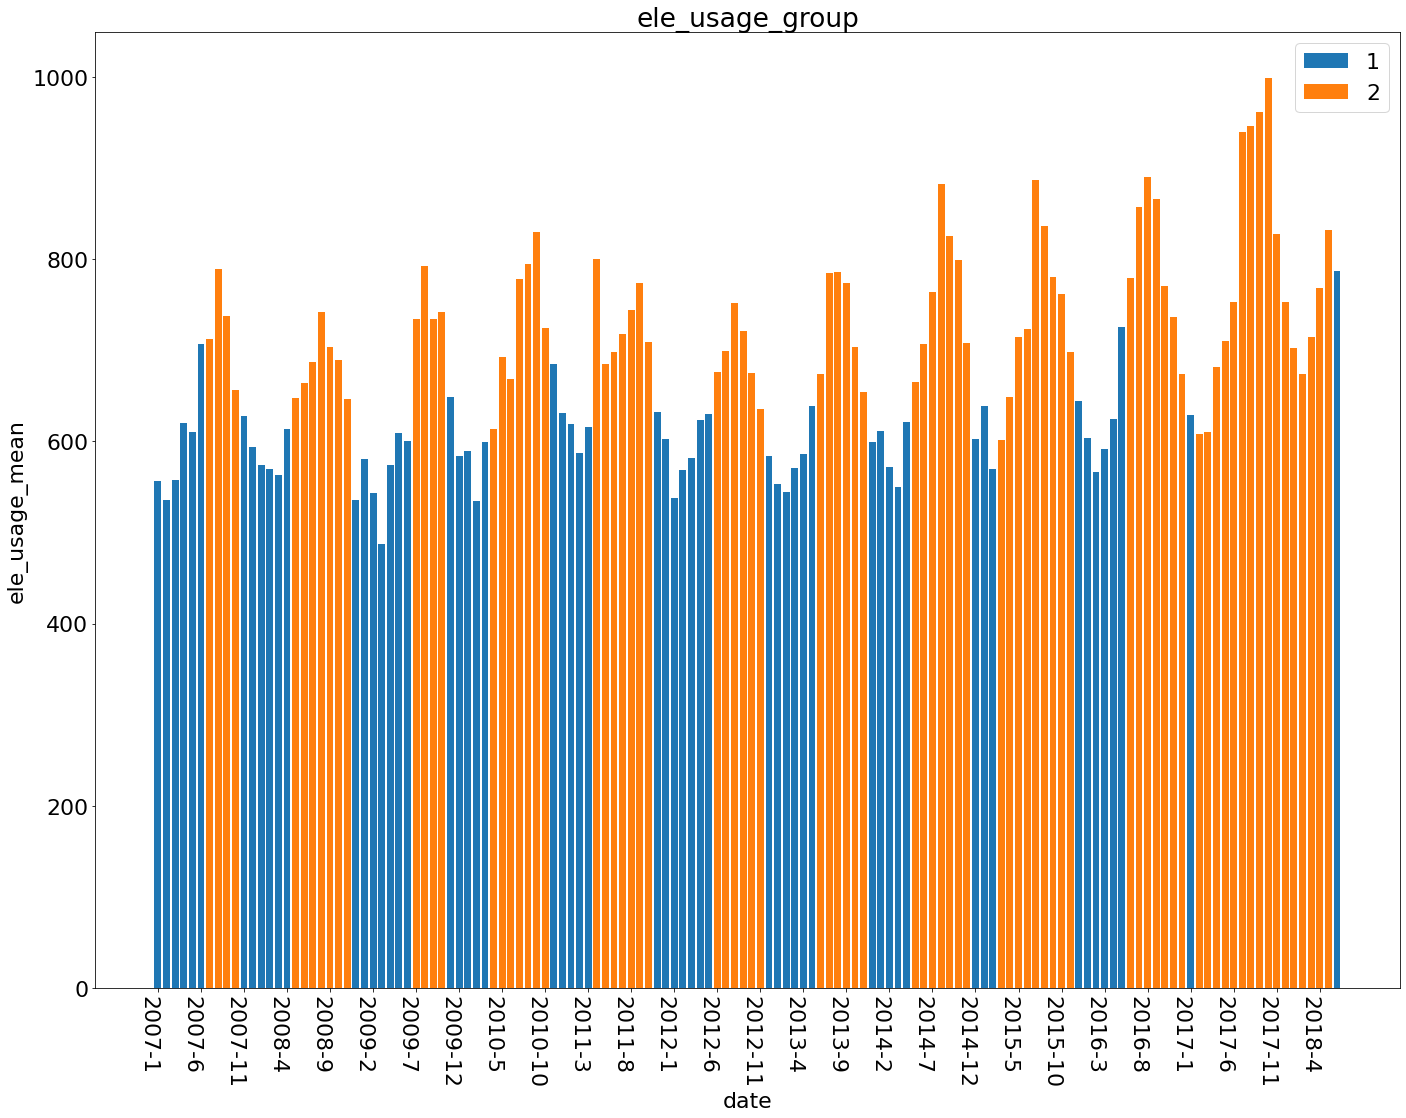

In [ ]:
showEleUsage(Matrix)

In [ ]:
dataset.head()

,date,98666106.0,98666005.0,98662541.0,98662535.0,98662527.0,98662400.0,98662012.0,98662008.0,98661810.0,...,98646352.0,98652412.0,63439500.0,98664911.0,63440513.0,43119810.0,98155469.0,53547020.0,44318829.0,53559819.0
0,2007-01-01,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
1,2007-01-02,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
2,2007-01-03,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
3,2007-01-04,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
4,2007-01-05,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323


# 以地理分布做分群
- 距離
- 方向
- ele性質

In [27]:
dataset_position = pd.read_csv(r'D:\JunShen\dataset\彰化_雲林用電量(專用電表_以處理重複電表.csv', encoding='big5', index_col=0)
dataset_position.修正電號 = dataset_position.修正電號.astype(np.int32)

In [3]:
dataset_position.head()

,gov,WELL_NO,TOWN,LON,LAT,TWD97_X,TWD97_Y,MEASURE_EQIP,修正電號,9601,...,10611,10612,10701,10702,10703,10704,10705,10706,volt,Unnamed: 0.1
0,雲林縣政府,1.033965e+13,二崙鄉,120.423325,23.757396,191218.0,2628275.0,無,98666106,193.5,...,302.5,302.5,358.0,358.0,536.0,536.0,377.5,377.5,NaN,NaN
1,雲林縣政府,1.033965e+13,二崙鄉,120.425958,23.756539,191486.0,2628179.0,無,98666005,229.5,...,356.0,356.0,359.5,359.5,384.5,384.5,366.0,366.0,NaN,NaN
2,雲林縣政府,1.023965e+13,二崙鄉,120.431458,23.757173,192047.0,2628247.0,無,98662541,150.0,...,229.5,229.5,221.5,221.5,265.5,265.5,314.5,314.5,NaN,NaN
3,雲林縣政府,1.023965e+13,二崙鄉,120.430300,23.757413,191929.0,2628274.0,無,98662535,437.0,...,528.5,528.5,373.0,373.0,477.5,477.5,625.0,625.0,NaN,NaN
4,雲林縣政府,1.023965e+13,二崙鄉,120.431299,23.757633,192031.0,2628298.0,無,98662527,24.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN


In [3]:
token = 'pk.eyJ1IjoidG9ueTg4MDEwOTU1IiwiYSI6ImNsNDN4MHNjdTA4dmgzbW1uOGU5bXpxb3MifQ.6v3Xll4pflqg9a90WQtX4w' # you will need your own token

In [4]:
def plot_position(df, cluster):
    fig = go.Figure()
    if cluster>0:
        for c in range(1,17):
            df_c = df.loc[df.cluster_num == c,:]
            fig.add_trace(go.Scattermapbox(lat=df_c['LAT'],
                lon=df_c['LON'],
                mode='markers+text',
                marker={'size':10},
                # textfont=dict(size=10, color='black'),
                # textposition='top right',
                name=f'cluster: {c}'))
    else:
        fig.add_trace(go.Scattermapbox(lat=df['LAT'],
                lon=df['LON'],
                mode='markers+text',
                marker={'size':10},
                text=df['修正電號'],
                textfont=dict(size=10, color='black'),
                textposition='top right',name=''))

    fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)
    fig.update_layout(
    mapbox = { 
        'center': { 'lon': 120.424471, 'lat': 23.758381},
        'zoom': 8
            },
    margin = {'l':0, 'r':0, 'b':0, 't':30})

    fig.show()

In [32]:
well_x = 191998.186
well_y = 2627561.41599999
def selectEle(well_x,well_y,df):
    condition = np.sqrt((df["TWD97_X"]-well_x)**2 + (df["TWD97_Y"]-well_y)**2) < 5000 # 5km
    return df.loc[condition,:]

In [33]:
df_5km = selectEle(well_x,well_y,dataset_position)

In [44]:
df_5km = df_5km.reset_index(drop=True)

## 性質

In [94]:
X = df_5km.loc[:,"9601":"10706"].values
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
X[np.isnan(X)] = 0

In [95]:
# import the SOM model
matrix_size = 2
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 138 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 1000)

In [96]:
y = df_5km.修正電號.values

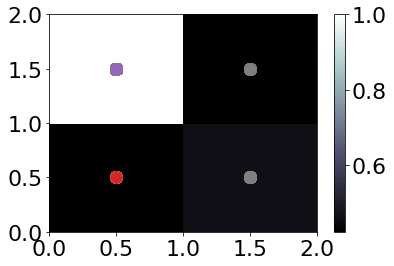

In [97]:
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# plot(0.5,0.5,'o')
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
show()
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)

In [45]:
for i in range(len(df_5km)):
    df_5km.loc[i,'mean'] = df_5km.loc[i,'9601':'10706'].mean()
    df_5km.loc[i,'sum'] = df_5km.loc[i,'9601':'10706'].sum()

In [98]:
count_list = []
c = 0
for i in range(matrix_size):
    for j in range(matrix_size):
        c += 1
        count_list.append(len(Matrix[i][j]))
        print(len(Matrix[i][j]), c)
        for ele in Matrix[i][j]:
            df_5km.loc[df_5km.修正電號==ele,'cluster_num'] = c

4297 1
191 2
5581 3
1019 4


In [99]:
df_5km.groupby(['cluster_num']).mean().loc[:,['mean','sum']]

,mean,sum
cluster_num,,
1.0,71.978036,9884.266116
2.0,1196.672176,164662.139865
3.0,28.402327,3896.487666
4.0,201.059612,27594.888943


In [100]:
plot_position(df_5km, True)

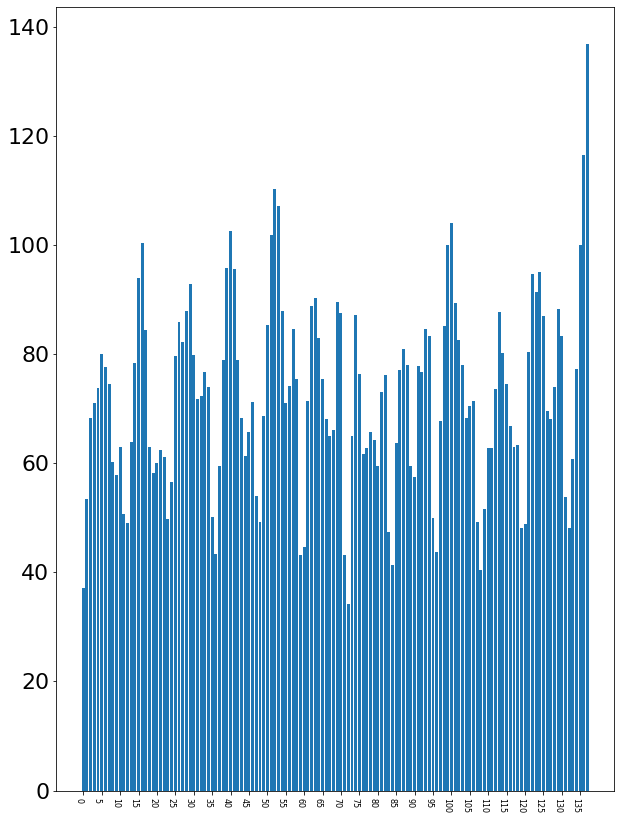

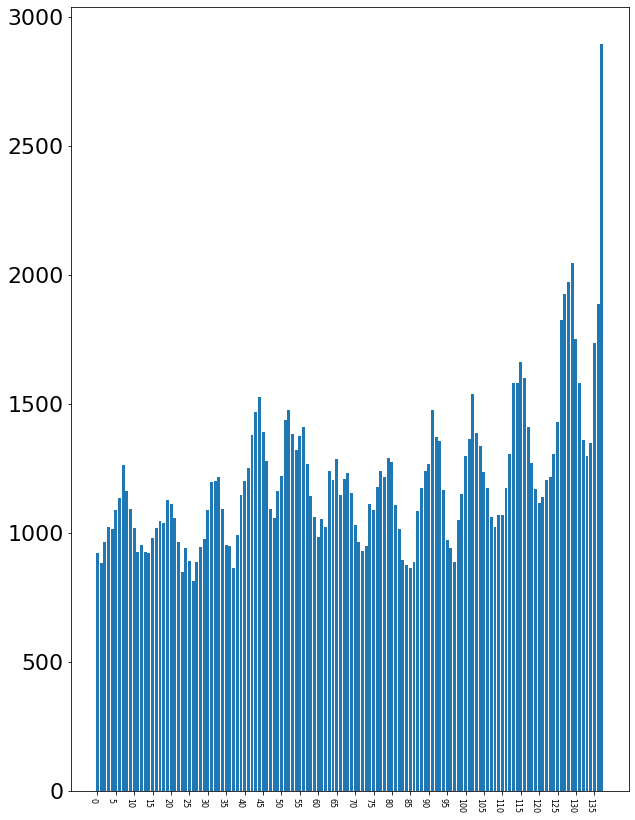

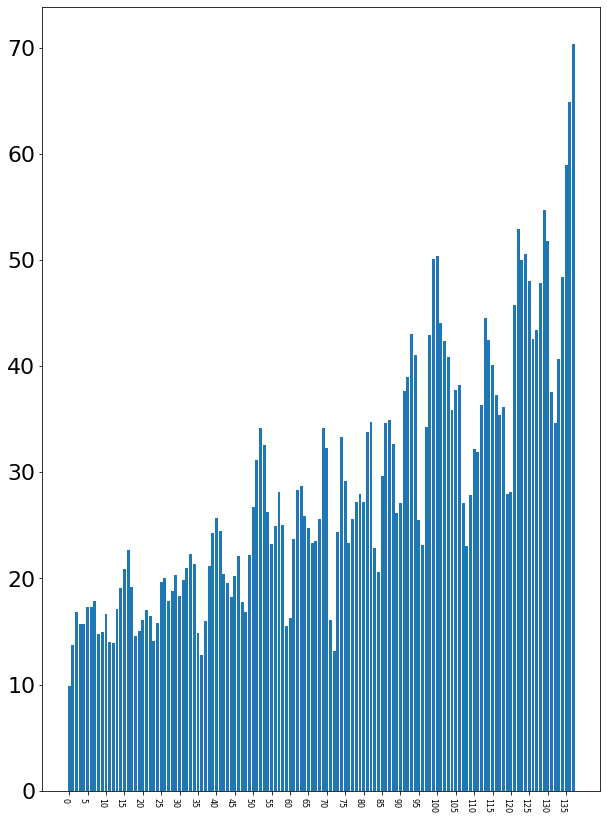

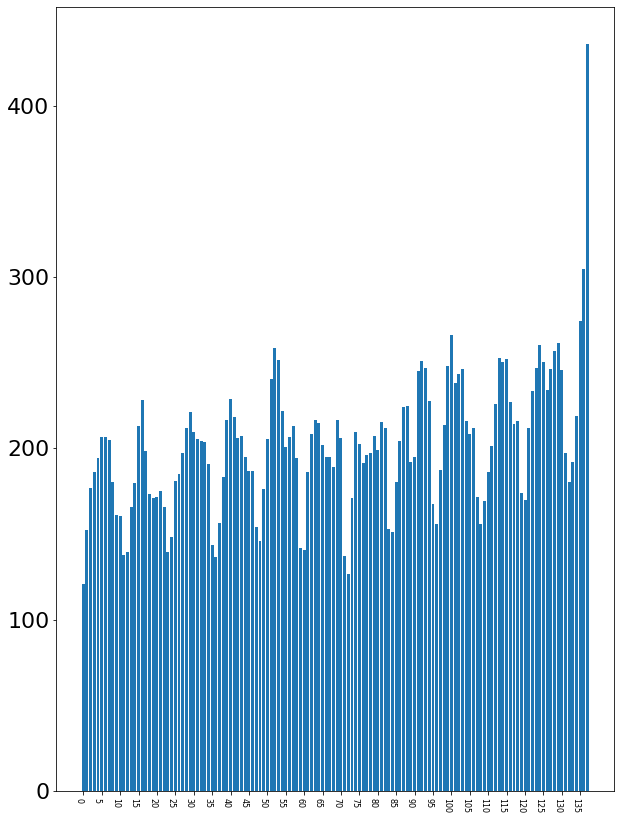

In [101]:
for i in range(4):
    fig = plt.figure(figsize=(10,16))

    plt.xticks(fontsize=8)
    plt.bar(np.arange(0, 138, 1), df_5km.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].iloc[i,:].values)
    plt.xticks(np.arange(0, 138+1, 5))
    fig.autofmt_xdate(rotation=-90)


In [62]:
df_pos_info_cluster = pd.DataFrame(columns={"cluster","mean","sum","count"})
df_pos_info_cluster['cluster'] = range(1,5,1)
df_pos_info_cluster = df_pos_info_cluster.set_index('cluster')
df_pos_info_cluster['mean'] = df_5km.groupby(['cluster_num']).mean().loc[:,"mean"]
df_pos_info_cluster['sum'] = df_5km.groupby(['cluster_num']).mean().loc[:,"sum"].round(3)
df_pos_info_cluster['count'] = count_list

In [63]:
df_pos_info_cluster

,count,mean,sum
cluster,,,
1,4927,24.969887,3424.935
2,3823,68.739999,9435.210
3,2092,128.314629,17619.441
4,246,1004.037751,138143.561


## 方向

In [118]:
def addDistanceFeature(well_x,well_y,df):
    df['LENGTH'] = np.sqrt(np.square(well_x-df["TWD97_X"]) + np.square(well_y-df["TWD97_Y"]))
    df['DIRECTION'] = np.arctan2(well_y-df["TWD97_Y"], well_x-df["TWD97_X"])
    # test
    # ix = df[df.DIRECTION<0].index
    # df.loc[ix, "DIRECTION"] += np.pi
    df['COS'] = np.cos(df['DIRECTION'])
    df['SIN'] = np.sin(df['DIRECTION'])

    return df

In [119]:
plot_position(df_5km,False)

In [120]:
df_5km_dir = addDistanceFeature(well_x,well_y,df_5km)

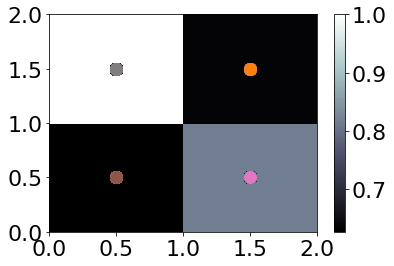

912 1
4266 2
4922 3
988 4


In [135]:
# X = df_5km_dir.loc[:,["TWD97_X","TWD97_Y","LENGTH"]].values
X = df_5km_dir.loc[:,["DIRECTION","SIN","COS"]].values

sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
X[np.isnan(X)] = 0
# import the SOM model
matrix_size = 2
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 3 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 1000)
y = df_5km_dir.修正電號.values
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# plot(0.5,0.5,'o')
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
show()
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)
count_list = []
c = 0
for i in range(matrix_size):
    for j in range(matrix_size):
        c += 1
        count_list.append(len(Matrix[i][j]))
        print(len(Matrix[i][j]), c)
        for ele in Matrix[i][j]:
            df_5km_dir.loc[df_5km_dir.修正電號==ele,'cluster_num'] = c

In [92]:
df_5km_dir.groupby(['cluster_num']).mean().loc[:,["DIRECTION","SIN","COS"]]

,DIRECTION,SIN,COS
cluster_num,,,
1.0,-0.246638,-0.242557,0.963453
2.0,-1.472341,-0.642615,-0.420492
3.0,1.575653,0.612386,-0.037303
4.0,-0.720256,-0.651949,0.742989


In [93]:
plot_position(df_5km_dir, True)

## 距離+性質

In [164]:
def som_distance(df_5km_dir):
    # X = df_5km_dir.loc[:,["TWD97_X","TWD97_Y","LENGTH"]].values
    df_tmp = df_5km_dir.loc[:,"9601":"10706"]
    df_tmp["length"] = df_5km_dir.loc[:,"LENGTH"]
    X = df_tmp.values

    sc = MinMaxScaler(feature_range = (0,1))
    X = sc.fit_transform(X)
    X[np.isnan(X)] = 0
    # import the SOM model
    matrix_size = 2
    # init the model
    som = MiniSom( x = matrix_size, y = matrix_size, input_len = 139 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
    # init the weight
    som.random_weights_init(X)
    # traing the model
    som.train_random(data = X, num_iteration = 1000)
    y = df_5km_dir.修正電號.values
    # making a self organization map
    from pylab import bone, pcolor, colorbar, plot, show
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    # plot(0.5,0.5,'o')
    for i, x in enumerate(X):
        w = som.winner(x)
        plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
    show()
    w, h = matrix_size, matrix_size
    Matrix = [[[] for x in range(w)] for y in range(h)] 
    for i, x in enumerate(X):
        w = som.winner(x)
        # plt.text(w[0], w[1], y[i], fontsize=12)
        Matrix[w[0]][w[1]].append(y[i])
        
    # sort by weigth
    weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
    for i in range(matrix_size):
        for j in range(matrix_size):
            weight_matrix[i][j] = som._weights[i][j].mean()
    weight_matrix = np.array(weight_matrix)
    count_list = []
    c = 0
    for i in range(matrix_size):
        for j in range(matrix_size):
            c += 1
            count_list.append(len(Matrix[i][j]))
            print(len(Matrix[i][j]), c)
            for ele in Matrix[i][j]:
                df_5km_dir.loc[df_5km_dir.修正電號==ele,'cluster_num'] = c
    
    return df_5km_dir

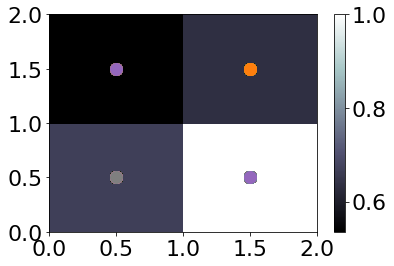

8297 1
1635 2
168 3
988 4


In [165]:
df_5km_dis = som_distance(df_5km_dir)

In [166]:
plot_position(df_5km_dis, True)

In [167]:
df_5km_dis.groupby(['cluster_num']).mean().loc[:,["mean","sum","LENGTH"]]

,mean,sum,LENGTH
cluster_num,,,
1.0,64.940291,8912.706219,3925.139405
2.0,51.562330,7077.431957,2058.981355
3.0,1296.322312,178435.772109,3156.472551
4.0,61.083991,8391.817055,1029.500274


# 整理電號匯出

In [141]:
df_out = {}

In [147]:
df_out["5km_total_chara_cluster1"] = df_5km.loc[df_5km.cluster_num == 1,"修正電號"].values
df_out["5km_total_chara_cluster2"] = df_5km.loc[df_5km.cluster_num == 2,"修正電號"].values
df_out["5km_total_chara_cluster3"] = df_5km.loc[df_5km.cluster_num == 3,"修正電號"].values
df_out["5km_total_chara_cluster4"] = df_5km.loc[df_5km.cluster_num == 4,"修正電號"].values

In [148]:
df_out["5km_total_diret_cluster1"] = df_5km_dir.loc[df_5km_dir.cluster_num == 1,"修正電號"].values
df_out["5km_total_diret_cluster2"] = df_5km_dir.loc[df_5km_dir.cluster_num == 2,"修正電號"].values
df_out["5km_total_diret_cluster3"] = df_5km_dir.loc[df_5km_dir.cluster_num == 3,"修正電號"].values
df_out["5km_total_diret_cluster4"] = df_5km_dir.loc[df_5km_dir.cluster_num == 4,"修正電號"].values

In [168]:
df_out["5km_total_dis_cluster1"] = df_5km_dis.loc[df_5km_dis.cluster_num == 1,"修正電號"].values
df_out["5km_total_dis_cluster2"] = df_5km_dis.loc[df_5km_dis.cluster_num == 2,"修正電號"].values
df_out["5km_total_dis_cluster3"] = df_5km_dis.loc[df_5km_dis.cluster_num == 3,"修正電號"].values
df_out["5km_total_dis_cluster4"] = df_5km_dis.loc[df_5km_dis.cluster_num == 4,"修正電號"].values

In [169]:
for i, v in enumerate(df_out):
    print(i, v)

0 5km_total_chara_cluster1
1 5km_total_chara_cluster2
2 5km_total_chara_cluster3
3 5km_total_chara_cluster4
4 5km_total_diret_cluster1
5 5km_total_diret_cluster2
6 5km_total_diret_cluster3
7 5km_total_diret_cluster4
8 5km_total_dis_cluster1
9 5km_total_dis_cluster2
10 5km_total_dis_cluster3
11 5km_total_dis_cluster4


In [170]:
# Save
np.save('som_ele_dict.npy', df_out)